# Development of the system notebook

In this notebook the development of the demand of Neodymium, electric cars and wind energy is visualised. 

The notebook is built up in the following way:
1. Libraries are imported
2. Functions are defined and data is imported
3. Wind supply clustered on wind
4. Electric cars clustered on electric cars
5. Neodymium demand clustered on electric cars
6. Neodymium demand clustered on wind
7. Extra trees feauture scoring analyses


## 1. Import libraries

In [77]:
from __future__ import (absolute_import, print_function, division, unicode_literals)
from ema_workbench import (Model, RealParameter, CategoricalParameter, ScalarOutcome, Constant,\
                           Policy, perform_experiments, ema_logging, \
                           TimeSeriesOutcome, perform_experiments,save_results, load_results)
#from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.analysis import (clusterer, plotting, Density, pairs_plotting, get_ex_feature_scores, \
                                    RuleInductionType, feature_scoring)
from ema_workbench.analysis import scenario_discovery_util as sdutil
from ema_workbench.analysis.plotting_util import do_titles,do_ylabels, TIME
import ema_workbench.analysis.plotting_util as plt_util
from ema_workbench.analysis.plotting import group_by_envelopes, single_envelope, plot_lines_with_envelopes, prepare_data 
from ema_workbench.analysis.plotting import simple_kde, group_density, plot_envelope, simple_density
from ema_workbench.analysis.plotting import lines, envelopes, kde_over_time, multiple_densities
from ema_workbench.analysis.pairs_plotting import pairs_scatter, pairs_density
import ema_workbench.analysis.cart as cart
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter,pairs_density)
import numpy as np
import seaborn as sns #; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
TIME_LABEL = 'Time'

import importlib
importlib.reload(sdutil)
importlib.reload(cart)

import itertools
import datetime
import math
import matplotlib.gridspec as gridspec
import scipy.stats.kde as kde
from matplotlib.colors import ColorConverter
from matplotlib.collections import PolyCollection, PathCollection
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.font_manager as fm
import matplotlib as mpl

## 2. Defining functions \& import data

In [79]:
def plot_clusters (column,x, cluster_name, zero = False,ylabel = False, alpha = None, title=False):
    dataset = outcomes
    expdata = experiments
    
    if title:
    #plot the clusters
        lines(x, dataset,group_by = cluster_name,outcomes_to_show = column,
        density=Density.KDE, titles=title)
    else:
        lines(x, dataset,group_by = cluster_name,outcomes_to_show = column,
        density=Density.KDE)
    fig = plt.gcf()
    ax = fig.get_axes()
    ax[0].set_xticklabels(labels_time)
    fig.set_size_inches(7,5)
    
    if alpha:
        for line in ax[0].get_lines():
            line.set_alpha(alpha)
    #layout
    plt.margins(0)
    sns.despine()
    if zero == True:
        ax[0].set_ylim([0,None])
        ax[0].set_xticklabels(labels_time)
    if ylabel:
        ax[0].set(ylabel=ylabel)
    change_fontsize(fig)
    sns.despine()
    # save_fig(fig,wd,'clustering'+paradigm+column)
    
    return fig,ax

In [84]:
def save_fig(fig, dir, name, dpi=300):
    '''save a high res and a low res version of the figure in the specified
    directory, using the label i.
    Parameters
    ----------
    fig : a Figure instance
    dir : str
    the directory where figures are to be saved
    name : str
    dpi : int, optional
    '''
    fig.savefig('{}/fig_{}_{}dpi.png'.format(dir, name, dpi), dpi=dpi,
    bbox_inches='tight', format='png')

In [87]:
def get_ex_feature_scores_topx (variable,top_nr):
    x= experiments.drop(['model', 'policy'], axis=1)
    y = outcomes[variable]
    all_scores = []
    top_x = set()
    for i in range(2, y.shape[1], 8):
        data = y[:, i]
        scores = get_ex_feature_scores(x, data,
        mode=RuleInductionType.REGRESSION)[0]
        top_x |= set(scores.nlargest(top_nr, 1).index.values)
        all_scores.append(scores)
    all_scores = pd.concat(all_scores, axis=1, sort=False)
    all_scores = all_scores.loc[top_x, :]
    all_scores.columns = np.arange(2000, 2050, 2)
    all_scores = all_scores.sort_values(by = [2000], ascending = False)
    list_of_cols_to_drop = []
    for i in all_scores.T:
        if max(all_scores.T[i]) < 0.3:
            list_of_cols_to_drop.append(i)
    all_scores_flipped = all_scores.T.drop(columns=list_of_cols_to_drop)
    all_scores = all_scores_flipped.T
    return (all_scores)

In [88]:
def plot_heatmap_overtime (scores,title):
    sns.heatmap(scores, cmap='viridis')
    fig = plt.gcf()
    ax = fig.get_axes()
    ax[0].set_xticklabels(np.arange(2000, 2050, 2))
    fig.autofmt_xdate()
    fig.set_size_inches(15,3)
    fig.suptitle('Extra trees feature scores for variables with highest impact on '+title)
    shorttitle = title.replace(" ","")
    fig.savefig(wd+shorttitle)
    plt.show()

In [89]:
labels_time = [2000, 2010, 2020, 2030, 2040, 2050]
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['legend.frameon'] = False

In [90]:
results = load_results('Results/Model_runs.tar.gz')
experiments, outcomes = results

In [15]:
wd = "C:/Users/User/Documents/Studie/EPA/Master Thesis/Model/Simulation script/New_runs/Results/Photos"

## 3. Cluster supply of wind clustered on wind

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


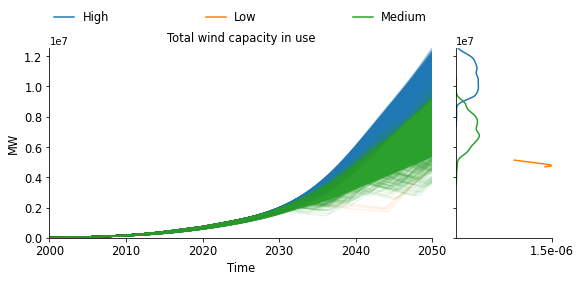

In [16]:
plot_clusters ('Total wind capacity in use', experiments, 'Wind clusters', zero = True, alpha=0.1, ylabel="MW")
fig = plt.gcf()
fig.set_size_inches(9,3.5)
#wd = "C:/Users/User/Documents/Studie/EPA/Master Thesis/Photos"
#fig.savefig(wd+"Wind_cap_clustered"+'.jpg')

## 4. Cluster supply of electric cars on electric cars

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


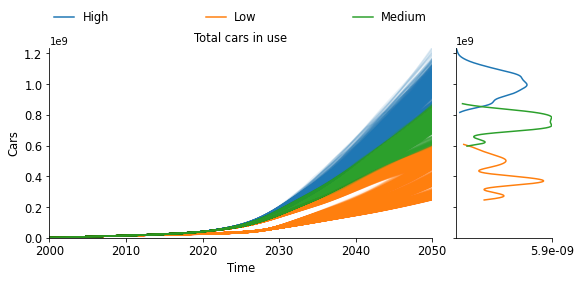

In [25]:
plot_clusters ('Total cars in use', experiments, 'EV clusters', zero = True, alpha=0.1, ylabel="Cars")
fig = plt.gcf()
fig.set_size_inches(9,3.5)
#wd = "C:/Users/User/Documents/Studie/EPA/Master Thesis/Photos"
#fig.savefig(wd+"Wind_cap_clustered"+'.jpg')

## 5. Cluster Neodymium demand on electric cars

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


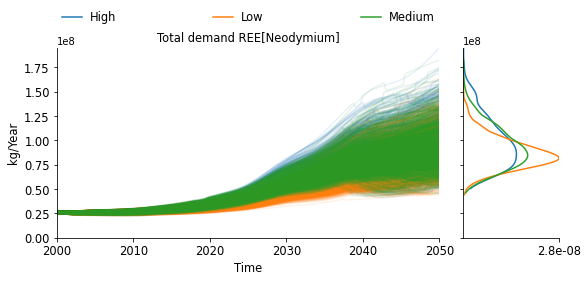

In [91]:
plot_clusters ('Total demand REE[Neodymium]', experiments, 'EV clusters', 
               zero = True, alpha=0.1, ylabel="kg/Year", 
               title= "Total demand Neodymium, clustered on electric cars")
fig = plt.gcf()
fig.set_size_inches(9,3.5)
#wd = "C:/Users/User/Documents/Studie/EPA/Master Thesis/Photos"
#fig.savefig(wd+"Wind_cap_clustered"+'.jpg')

## 6. Cluster Neodymium demand on wind

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


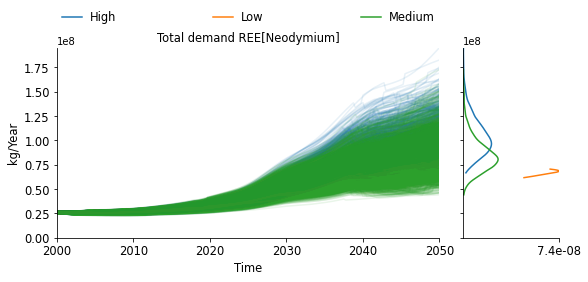

In [92]:
plot_clusters ('Total demand REE[Neodymium]', experiments, 'Wind clusters', 
               zero = True, alpha=0.1, ylabel="kg/Year", 
               title= "Total demand Neodymium, clustered on wind energy")
fig = plt.gcf()
fig.set_size_inches(9,3.5)
#wd = "C:/Users/User/Documents/Studie/EPA/Master Thesis/Photos"
#fig.savefig(wd+"Wind_cap_clustered"+'.jpg')

## 7. Extra Trees feauture scoring analyses

In [31]:
experiments = experiments.drop(columns =["EV clusters","Wind clusters"])

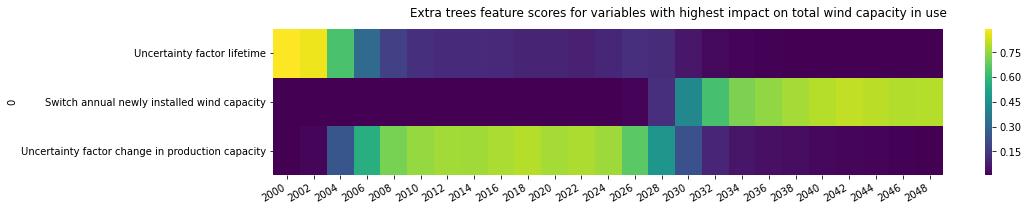

In [74]:
all_scores_wind = get_ex_feature_scores_topx('Total wind capacity in use',3)
plot_heatmap_overtime(all_scores_wind,title = 'total wind capacity in use')

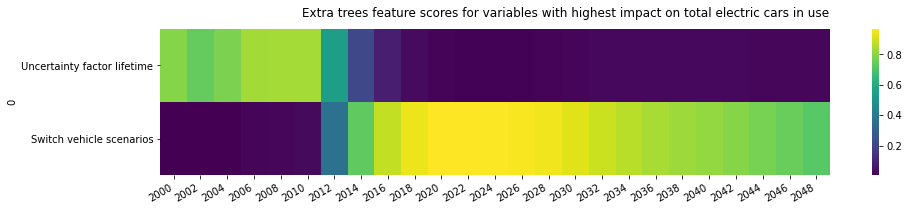

In [75]:
all_scores_cars = get_ex_feature_scores_topx('Total cars in use',3)
plot_heatmap_overtime(all_scores_cars,title = 'total electric cars in use')

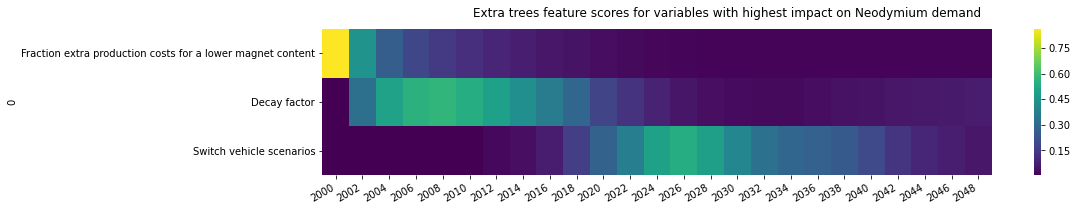

In [76]:
all_scores_nd = get_ex_feature_scores_topx('Total demand REE[Neodymium]',3)
plot_heatmap_overtime(all_scores_nd,title = 'Neodymium demand')